In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [664]:
df = pd.read_csv("/Users/dev/Personal/DS & AI Class Notes/Data Sets/Adaboost/loan_approval.csv" )

In [665]:
df.drop("Loan_ID",axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## Replacing df["Dependents"] values by str to int. by Regex

In [667]:
df["Dependents"].replace("[^0-9.]","",regex=True,inplace=True)

## Removing Nans 

In [668]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [669]:
df["Gender"].fillna(method='pad',inplace=True)

In [670]:
df["Married"].fillna(method='pad',inplace=True)

In [671]:
df["Dependents"].fillna(method='pad',inplace=True)

In [672]:
df["Self_Employed"].fillna(method='pad',inplace=True)

In [673]:
def nanremove(df):
    m = round(df.mean(),2)
    df.replace(np.nan,m,inplace = True)

In [674]:
nanremove(df["LoanAmount"])

In [675]:
nanremove(df["Loan_Amount_Term"])

In [676]:
nanremove(df["Credit_History"])

In [677]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Checking Balance of DF

In [678]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

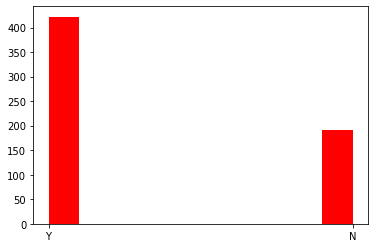

In [679]:
plt.hist(df["Loan_Status"],color='Red')
plt.show()

### Checking And Removing 0's

In [680]:
def checkz(df):
    return df[df == 0].value_counts()

In [681]:
for i in df.columns:
    print(checkz(df[i]))

Series([], Name: Gender, dtype: int64)
Series([], Name: Married, dtype: int64)
Series([], Name: Dependents, dtype: int64)
Series([], Name: Education, dtype: int64)
Series([], Name: Self_Employed, dtype: int64)
Series([], Name: ApplicantIncome, dtype: int64)
0.0    273
Name: CoapplicantIncome, dtype: int64
Series([], Name: LoanAmount, dtype: int64)
Series([], Name: Loan_Amount_Term, dtype: int64)
0.0    89
Name: Credit_History, dtype: int64
Series([], Name: Property_Area, dtype: int64)
Series([], Name: Loan_Status, dtype: int64)


In [682]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [683]:
clist = [ 'Dependents','ApplicantIncome', 'CoapplicantIncome',
         'LoanAmount','Loan_Amount_Term', 'Credit_History', ]

In [684]:
for i in clist:
    zeroremove(df[i])

In [685]:
for i in df.columns:
    print(checkz(df[i]))

Series([], Name: Gender, dtype: int64)
Series([], Name: Married, dtype: int64)
Series([], Name: Dependents, dtype: int64)
Series([], Name: Education, dtype: int64)
Series([], Name: Self_Employed, dtype: int64)
Series([], Name: ApplicantIncome, dtype: int64)
Series([], Name: CoapplicantIncome, dtype: int64)
Series([], Name: LoanAmount, dtype: int64)
Series([], Name: Loan_Amount_Term, dtype: int64)
Series([], Name: Credit_History, dtype: int64)
Series([], Name: Property_Area, dtype: int64)
Series([], Name: Loan_Status, dtype: int64)


### OD_Tech With The help of Skew

In [686]:
def odiqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    m = df.mean()
    df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
    return df

In [687]:
def odmsd(df):
    m = round(df.mean(),2)
    s = round(df.std(),2)
    low = round(m-(3*s),2)
    high = round(m+(3*s),2)
    ft1 = df[df<low]
    ft2 = df[df>high]
    df = df.map(lambda x : low if x < low else (high if x > high else x ))

In [688]:
for i in clist:
    print(f'{i} is {df[i].skew()}')

Dependents is 0.9764220531079079
ApplicantIncome is 6.539513113994625
CoapplicantIncome is 9.677702794378638
LoanAmount is 2.7266039186591304
Loan_Amount_Term is -2.3896799467122745
Credit_History is -1.3108351339315514


In [689]:
for i in clist:
    print(f'{i} is {df[i].dtype}')

Dependents is object
ApplicantIncome is int64
CoapplicantIncome is float64
LoanAmount is float64
Loan_Amount_Term is float64
Credit_History is float64


### Bcz df["Dependents"] is str type

In [690]:
df["Dependents"] = df["Dependents"].astype(int)

In [691]:
for i in clist:
    if df[i].skew() <= 0.5:
        odmsd(df[i])
    else:
        df[i] = odiqr(df[i])

In [692]:
for i in clist:
    print(f'{i} is {df[i].skew()}')

Dependents is 0.9764220531079079
ApplicantIncome is 0.9131963245496909
CoapplicantIncome is 0.6991764314798369
LoanAmount is 0.36795693965510146
Loan_Amount_Term is -2.3896799467122745
Credit_History is -1.3108351339315514


In [693]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,1621.250000,146.41,360.0,1.00,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.000000,128.00,360.0,1.00,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,1621.250000,66.00,360.0,1.00,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.000000,120.00,360.0,1.00,Urban,Y
4,Male,No,0,Graduate,No,6000.0,1621.250000,141.00,360.0,1.00,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,1621.250000,71.00,360.0,1.00,Rural,Y
610,Male,Yes,3,Graduate,No,4106.0,1621.250000,40.00,180.0,1.00,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,2342.094739,253.00,360.0,1.00,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,1621.250000,187.00,360.0,1.00,Urban,Y


In [694]:
from sklearn.preprocessing import OneHotEncoder

In [695]:
ohe = OneHotEncoder(drop='first')

In [696]:
df = pd.concat([df,pd.DataFrame(ohe.fit_transform(df[["Gender"]]).toarray(),dtype=int,
                                columns=["Male"])],axis=1).drop("Gender",axis=1)

In [697]:
ohe.categories_

[array(['Female', 'Male'], dtype=object)]

In [698]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male
0,No,0,Graduate,No,5849.0,1621.250000,146.41,360.0,1.00,Urban,Y,1
1,Yes,1,Graduate,No,4583.0,1508.000000,128.00,360.0,1.00,Rural,N,1
2,Yes,0,Graduate,Yes,3000.0,1621.250000,66.00,360.0,1.00,Urban,Y,1
3,Yes,0,Not Graduate,No,2583.0,2358.000000,120.00,360.0,1.00,Urban,Y,1
4,No,0,Graduate,No,6000.0,1621.250000,141.00,360.0,1.00,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900.0,1621.250000,71.00,360.0,1.00,Rural,Y,0
610,Yes,3,Graduate,No,4106.0,1621.250000,40.00,180.0,1.00,Rural,Y,1
611,Yes,1,Graduate,No,8072.0,2342.094739,253.00,360.0,1.00,Urban,Y,1
612,Yes,2,Graduate,No,7583.0,1621.250000,187.00,360.0,1.00,Urban,Y,1


In [699]:
ohe1 = OneHotEncoder(drop='first')

In [700]:
df = pd.concat([df,pd.DataFrame(ohe1.fit_transform(df[["Married"]]).toarray(),dtype=int,columns=["Married_Yes"])],
               axis=1).drop("Married",axis=1)

In [701]:
ohe1.categories_

[array(['No', 'Yes'], dtype=object)]

In [702]:
df

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Married_Yes
0,0,Graduate,No,5849.0,1621.250000,146.41,360.0,1.00,Urban,Y,1,0
1,1,Graduate,No,4583.0,1508.000000,128.00,360.0,1.00,Rural,N,1,1
2,0,Graduate,Yes,3000.0,1621.250000,66.00,360.0,1.00,Urban,Y,1,1
3,0,Not Graduate,No,2583.0,2358.000000,120.00,360.0,1.00,Urban,Y,1,1
4,0,Graduate,No,6000.0,1621.250000,141.00,360.0,1.00,Urban,Y,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,Graduate,No,2900.0,1621.250000,71.00,360.0,1.00,Rural,Y,0,0
610,3,Graduate,No,4106.0,1621.250000,40.00,180.0,1.00,Rural,Y,1,1
611,1,Graduate,No,8072.0,2342.094739,253.00,360.0,1.00,Urban,Y,1,1
612,2,Graduate,No,7583.0,1621.250000,187.00,360.0,1.00,Urban,Y,1,1


In [703]:
ohe2 = OneHotEncoder(drop='first')

In [704]:
ohe2.fit(df[["Education"]])

OneHotEncoder(drop='first')

In [705]:
ohe2.categories_

[array(['Graduate', 'Not Graduate'], dtype=object)]

In [706]:
df = pd.concat([df,pd.DataFrame(ohe2.fit_transform(df[["Education"]]).toarray(),
                                dtype=int,columns=["Not Graduate"])],axis=1).drop("Education",axis=1)

In [707]:
df

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Married_Yes,Not Graduate
0,0,No,5849.0,1621.250000,146.41,360.0,1.00,Urban,Y,1,0,0
1,1,No,4583.0,1508.000000,128.00,360.0,1.00,Rural,N,1,1,0
2,0,Yes,3000.0,1621.250000,66.00,360.0,1.00,Urban,Y,1,1,0
3,0,No,2583.0,2358.000000,120.00,360.0,1.00,Urban,Y,1,1,1
4,0,No,6000.0,1621.250000,141.00,360.0,1.00,Urban,Y,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,No,2900.0,1621.250000,71.00,360.0,1.00,Rural,Y,0,0,0
610,3,No,4106.0,1621.250000,40.00,180.0,1.00,Rural,Y,1,1,0
611,1,No,8072.0,2342.094739,253.00,360.0,1.00,Urban,Y,1,1,0
612,2,No,7583.0,1621.250000,187.00,360.0,1.00,Urban,Y,1,1,0


In [708]:
ohe3 = OneHotEncoder(drop='first')

In [709]:
ohe3.fit(df[["Self_Employed"]])

OneHotEncoder(drop='first')

In [710]:
ohe3.categories_

[array(['No', 'Yes'], dtype=object)]

In [711]:
df = pd.concat([df,pd.DataFrame(ohe3.fit_transform(df[["Self_Employed"]]).toarray(),
                                dtype=int,columns=["Self_Employed_Yes"])],axis=1).drop("Self_Employed",axis=1)

In [712]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Married_Yes,Not Graduate,Self_Employed_Yes
0,0,5849.0,1621.250000,146.41,360.0,1.00,Urban,Y,1,0,0,0
1,1,4583.0,1508.000000,128.00,360.0,1.00,Rural,N,1,1,0,0
2,0,3000.0,1621.250000,66.00,360.0,1.00,Urban,Y,1,1,0,1
3,0,2583.0,2358.000000,120.00,360.0,1.00,Urban,Y,1,1,1,0
4,0,6000.0,1621.250000,141.00,360.0,1.00,Urban,Y,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.0,1621.250000,71.00,360.0,1.00,Rural,Y,0,0,0,0
610,3,4106.0,1621.250000,40.00,180.0,1.00,Rural,Y,1,1,0,0
611,1,8072.0,2342.094739,253.00,360.0,1.00,Urban,Y,1,1,0,0
612,2,7583.0,1621.250000,187.00,360.0,1.00,Urban,Y,1,1,0,0


In [713]:
ohe4 = OneHotEncoder()

In [714]:
ohe4.fit(df[["Property_Area"]])

OneHotEncoder()

In [715]:
ohe4.categories_

[array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [716]:
df = pd.concat([df,pd.DataFrame(ohe4.fit_transform(df[["Property_Area"]]).toarray(),dtype=int,
                                columns=['Rural','Semiurban','Urban'])],axis=1).drop("Property_Area",axis=1)

In [717]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Married_Yes,Not Graduate,Self_Employed_Yes,Rural,Semiurban,Urban
0,0,5849.0,1621.250000,146.41,360.0,1.00,Y,1,0,0,0,0,0,1
1,1,4583.0,1508.000000,128.00,360.0,1.00,N,1,1,0,0,1,0,0
2,0,3000.0,1621.250000,66.00,360.0,1.00,Y,1,1,0,1,0,0,1
3,0,2583.0,2358.000000,120.00,360.0,1.00,Y,1,1,1,0,0,0,1
4,0,6000.0,1621.250000,141.00,360.0,1.00,Y,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.0,1621.250000,71.00,360.0,1.00,Y,0,0,0,0,1,0,0
610,3,4106.0,1621.250000,40.00,180.0,1.00,Y,1,1,0,0,1,0,0
611,1,8072.0,2342.094739,253.00,360.0,1.00,Y,1,1,0,0,0,0,1
612,2,7583.0,1621.250000,187.00,360.0,1.00,Y,1,1,0,0,0,0,1


### Encoding of df["Loan_Status"] with Label Encoder

In [718]:
from sklearn.preprocessing import LabelEncoder

In [719]:
le = LabelEncoder()

In [720]:
le.fit(df["Loan_Status"])

LabelEncoder()

In [721]:
df = pd.concat([ df, pd.DataFrame(le.fit_transform(df["Loan_Status"]),columns=["LOAN_Status"])]
               ,axis=1).drop("Loan_Status",axis=1)

In [722]:
le.classes_

array(['N', 'Y'], dtype=object)

In [723]:
df = df[['Male','Married_Yes','Dependents','Not Graduate',
         'Self_Employed_Yes','ApplicantIncome','CoapplicantIncome',
        'LoanAmount','Loan_Amount_Term','Credit_History','Rural','Semiurban','Urban','LOAN_Status']]

In [724]:
df

,Male,Married_Yes,Dependents,Not Graduate,Self_Employed_Yes,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban,LOAN_Status
0,1,0,0,0,0,5849.0,1621.250000,146.41,360.0,1.00,0,0,1,1
1,1,1,1,0,0,4583.0,1508.000000,128.00,360.0,1.00,1,0,0,0
2,1,1,0,0,1,3000.0,1621.250000,66.00,360.0,1.00,0,0,1,1
3,1,1,0,1,0,2583.0,2358.000000,120.00,360.0,1.00,0,0,1,1
4,1,0,0,0,0,6000.0,1621.250000,141.00,360.0,1.00,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,1621.250000,71.00,360.0,1.00,1,0,0,1
610,1,1,3,0,0,4106.0,1621.250000,40.00,180.0,1.00,1,0,0,1
611,1,1,1,0,0,8072.0,2342.094739,253.00,360.0,1.00,0,0,1,1
612,1,1,2,0,0,7583.0,1621.250000,187.00,360.0,1.00,0,0,1,1


### Splitting

In [725]:
X = df.drop("LOAN_Status",axis=1)

In [726]:
X.sample()

,Male,Married_Yes,Dependents,Not Graduate,Self_Employed_Yes,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
281,1,1,0,0,0,3927.0,800.0,112.0,360.0,1.0,0,1,0


In [727]:
y = df["LOAN_Status"]

In [728]:
y.sample()

363    1
Name: LOAN_Status, dtype: int64

In [729]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier

In [730]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.20)

In [731]:
X.shape , Xtrain.shape , Xtest.shape

((614, 13), (491, 13), (123, 13))

In [732]:
y.shape , ytrain.shape , ytest.shape

((614,), (491,), (123,))

In [733]:
kf = KFold(n_splits=11)

In [734]:
dct = DecisionTreeClassifier()

In [735]:
rfc = RandomForestClassifier()

In [736]:
algo = [ dct , rfc ]

### Without Feature Scaling


In [737]:
for i in algo:
    i.fit(Xtrain,ytrain)
    s = i.score(Xtest,ytest)
    print(f'{i} = {s}')

DecisionTreeClassifier() = 0.7317073170731707
RandomForestClassifier() = 0.7560975609756098


### With Feature Scaling

In [738]:
ss = StandardScaler()

In [739]:
ss.fit(Xtrain)

StandardScaler()

In [740]:
Xtrain_ss = ss.transform(Xtrain)

In [741]:
Xtest_ss = ss.transform(Xtest)

In [742]:
for i in algo:
    i.fit(Xtrain_ss,ytrain)
    s = i.score(Xtest_ss,ytest)
    print(f'{i} = {s}')

DecisionTreeClassifier() = 0.7317073170731707
RandomForestClassifier() = 0.7804878048780488


### With Cross Validation

In [743]:
for i in algo:
    s = cross_val_score(i,X,y,cv = kf)
    print(f'{i} = {s.mean()}')

DecisionTreeClassifier() = 0.6514757969303425
RandomForestClassifier() = 0.7507969303423849


## Boosting

In [744]:
rfc1 = RandomForestClassifier(n_estimators=150,max_depth=2,max_leaf_nodes=3)

In [745]:
abc = AdaBoostClassifier()

In [746]:
algo1 = [rfc1  , abc ]

In [747]:
for i in algo1:
    print(i)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150)
AdaBoostClassifier()


### Without Feature Scaling


In [748]:
for i in algo1:
    i.fit(Xtrain,ytrain)
    s = i.score(Xtest,ytest)
    print(f'{i} = {s}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.6910569105691057
AdaBoostClassifier() = 0.7642276422764228


### With Feature Scaling

In [749]:
for i in algo1:
    i.fit(Xtrain_ss,ytrain)
    s = i.score(Xtest_ss,ytest)
    print(f'{i} = {s}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.6910569105691057
AdaBoostClassifier() = 0.7642276422764228


###  With Cross Validation (Boosting)


In [750]:
%%time
for i in algo1:
    s = cross_val_score(i,X,y,cv = kf)
    print(f'{i} = {s.mean()}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.6806965761511217
AdaBoostClassifier() = 0.7425619834710744
CPU times: user 1.71 s, sys: 15.7 ms, total: 1.72 s
Wall time: 1.72 s


### With GridSearch CV

In [751]:
from sklearn.model_selection import GridSearchCV

In [752]:
dic = { 'n_estimators' : [100,125,180],'criterion': ['gini', 'entropy'], 'max_depth' : [2,3,10]
       ,'min_samples_leaf' : [ 1,5]  }

In [753]:
kf1 = KFold(n_splits=12)

In [754]:
gvc = GridSearchCV(RandomForestClassifier(),param_grid=dic,cv = kf1)

In [755]:
%%time
gvc.fit(X,y)

CPU times: user 46.1 s, sys: 399 ms, total: 46.5 s
Wall time: 46.7 s


GridSearchCV(cv=KFold(n_splits=12, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 10], 'min_samples_leaf': [1, 5],
                         'n_estimators': [100, 125, 180]})

In [756]:
gvc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'n_estimators': 180}

In [757]:
gvc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       n_estimators=180)

In [758]:
gvc.best_score_

0.763826043237808